# Loan prediction using **Machine** **Learning** 
InfoPillar Solution Pvt Ltd. Internship task
:- 1

# ***Project idea*** – The idea behind this ML project is to build a model that will classify how much loan the user can take. It is based on the user’s marital status, education, number of dependents, and employments. You can build a linear model for this project

# ***Libraries***

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


# Dataset *Reading*

In [34]:
boston = load_boston()
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# **Clean - Preprocessing The Data**

In [35]:
boston.data.shape

(506, 13)

In [36]:
import os

In [37]:
os.getcwd()

'/content'

In [38]:
boston.data.shape

(506, 13)

In [39]:
boston.data.size

6578

In [40]:
boston_df=pd.DataFrame(boston.data)

In [41]:
boston_df.columns=boston.feature_names

In [42]:
boston_df['PRICE']=boston.target
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]


# **Plot**

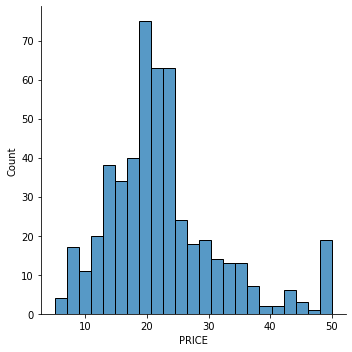

In [43]:
sns.displot(boston_df['PRICE'])

# To check is there any column null or not

In [44]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

# Dividing The **Dataset**

In [45]:
X = boston_df.iloc[:,:-1].values
y = boston_df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 80)

# **Model Building**

In [46]:
linear_Regression_Model = LinearRegression()
linear_Regression_Model.fit(X_train,y_train)
#Value of m
print('Coefficients: \n',linear_Regression_Model.coef_)

Coefficients: 
 [-1.07418254e-01  5.22010486e-02  4.98839331e-02  3.01057658e+00
 -1.76082726e+01  3.67308035e+00  1.11587846e-02 -1.47581694e+00
  2.96069876e-01 -1.12908159e-02 -8.71508287e-01  9.76006235e-03
 -6.27739570e-01]


# Value of **C**

In [47]:
print("Value of C is :",linear_Regression_Model.intercept_)

Value of C is : 35.54288746845883


# The **Prediction**

In [48]:
y_pred = linear_Regression_Model.predict(X_test)
y_pred

array([19.45770639, 37.19931993, 25.12570498, 22.04299495, 24.0390742 ,
       35.05747632, 41.06247637, 24.71906144, 27.56081018, 21.97440284,
       13.98492549, 23.77895314, 23.95798135, 21.9046238 , 23.32527841,
       28.45009098, 33.57734904, 17.81687675, 23.39112491, 25.59623451,
       12.91547066, 20.19655606, 20.78434122, 19.63332874, 17.02608918,
       35.14546455, 22.88487269, 15.59625493, 23.52495483, 25.82525054,
       17.47918033, 27.63068766, 26.51307142, 20.77431267, 17.86850615,
       17.00308732, 34.57098727, 20.78936443, 21.26211944, 11.99603219,
       31.02787895, 37.99328397, 28.77055143, 31.03580241, 25.17559352,
       27.14684614, 17.93383898, 29.54029832, 26.14956244, 15.82026912,
       18.22109912, 20.10636887, 17.40298161, 24.24173726, 18.88102308,
       13.58084297, 34.78283907, 19.33259781, 20.76432096, 18.65511866,
       24.14761938, 25.57062518, 29.46123453, 27.49368177, 31.49636075,
       36.89202583, 19.92549096, 35.4941753 , 12.93393197, 12.93

# **Evaluating** Model

In [49]:
print("Mean Absolute Error     :",mean_absolute_error(y_pred,y_test))
print("Mean Squared Error      :",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score is             :",r2_score(y_test,y_pred))

Mean Absolute Error     : 2.8760813890529904
Mean Squared Error      : 16.241848626738413
Root Mean Squared Error : 4.03011769390652
R2 score is             : 0.7429669842220965


# The **Plot** prediction line

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


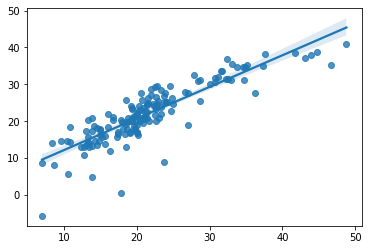

In [50]:
sns.regplot(y_test, y_pred)

# Now We Get The "*Accuracy For Model*" Is ** 74.29044%**